In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2

#modulos para conexão com o google drive
from google.colab import drive
drive.mount('/content/drive')

**TRATAMENTO IMAGENS**

In [ ]:
lista_recortes = []
lista_nomes = []

def rgb_gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

def img_quadrado(image):
    quadrado = max(image.shape[0:2])
    final = np.zeros((quadrado,quadrado,3),np.uint8)
    ax,ay = (quadrado - image.shape[1])//2,(quadrado - image.shape[0])//2
    final[ay:image.shape[0]+ay,ax:ax+image.shape[1]] = image
    return final

for num in range(0, len(imgs)):
    image = np.array(cv2.imread('/mapas/'+ imgs[num]))
    final = img_quadrado(image)

    corte = cv2.resize(final,(256, 256),cv2.INTER_NEAREST)
    lista_recortes.append(corte)

    image = np.array(cv2.imread('/mapas/'+ masks[num]))
    final = img_quadrado(image)

    mask = cv2.resize(final,(256, 256),cv2.INTER_NEAREST)
    mask = rgb_gray(mask)
    mask[mask != 0] = 1
    lista_nomes.append(mask)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


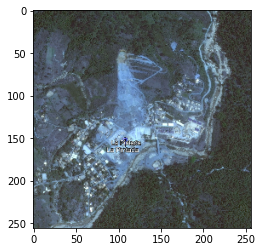

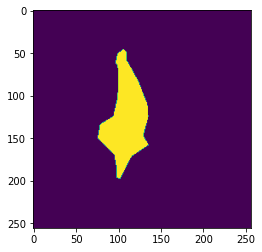

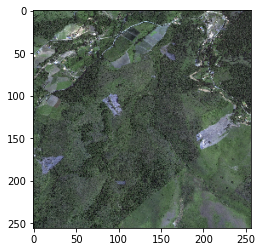

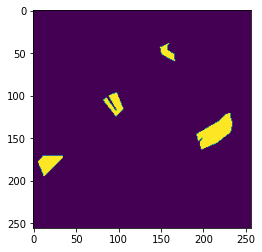

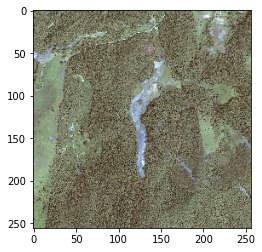

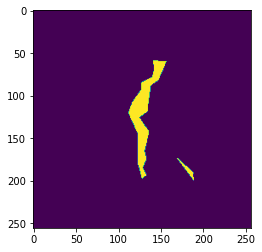

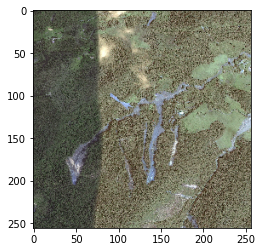

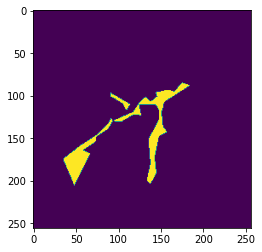

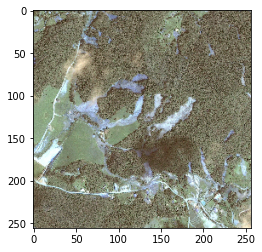

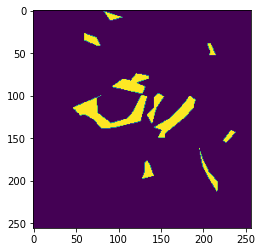

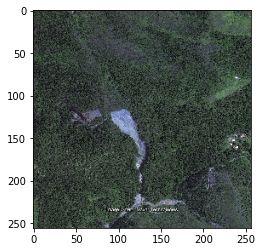

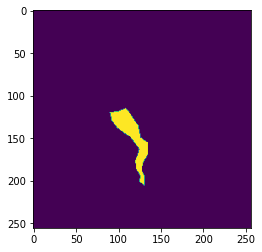

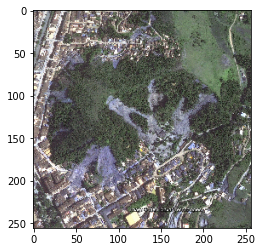

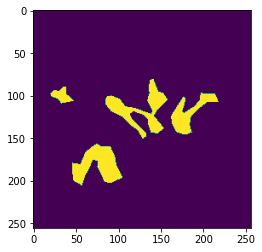

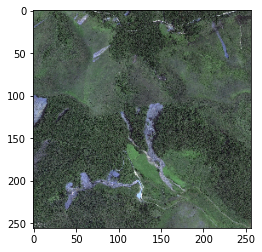

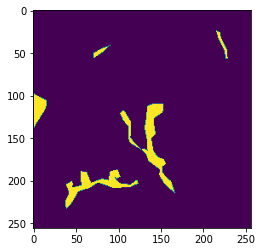

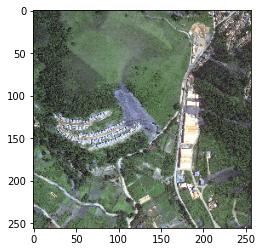

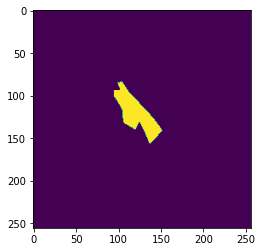

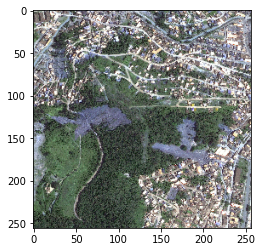

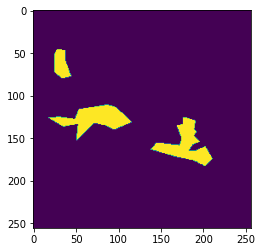

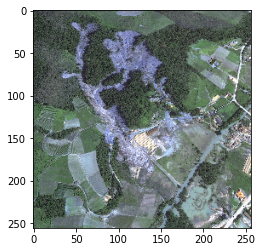

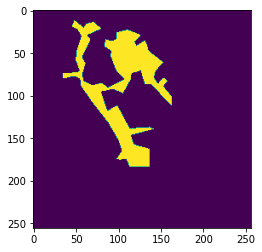

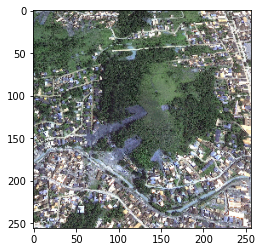

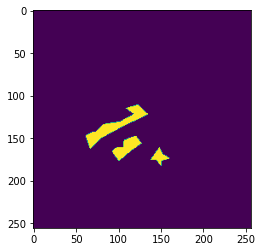

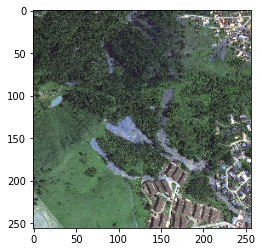

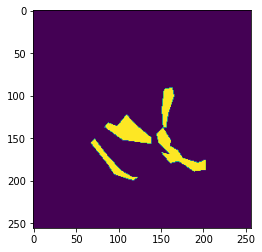

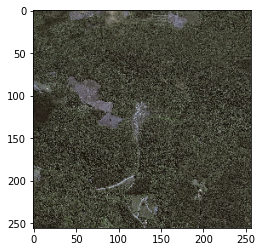

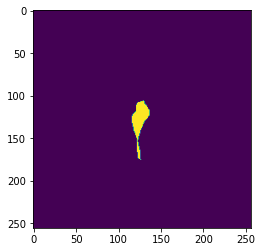

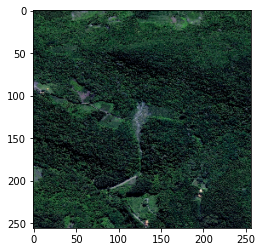

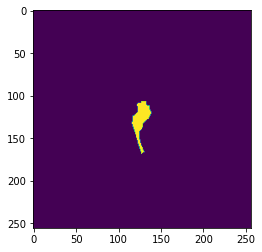

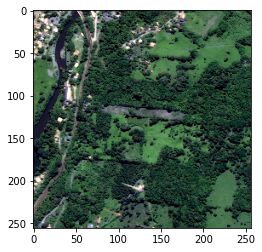

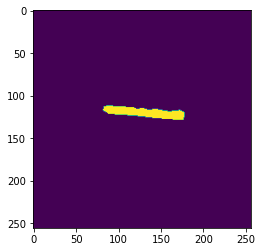

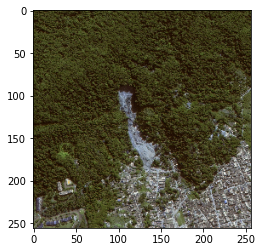

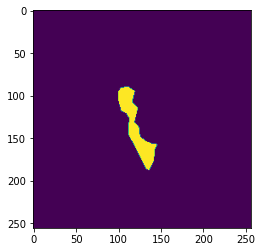

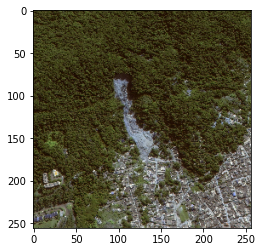

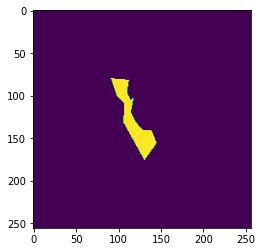

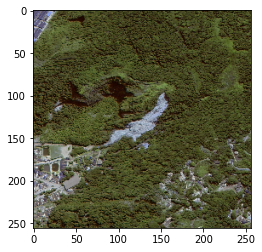

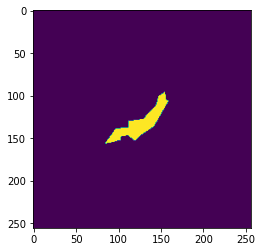

In [ ]:
import matplotlib.pyplot as plt

for i in range(0, len(lista_recortes)):
  plt.figure()
  plt.imshow(lista_recortes[i])
  plt.figure()
  plt.imshow(lista_nomes[i])


**SEPARAÇÃO TREINO/TESTE**

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils import np_utils
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dropout, concatenate, Input, UpSampling2D, Conv2DTranspose, Flatten, Dense
from tensorflow.keras.utils import to_categorical

#listas são convertidas para array
lista_r = np.array(lista_recortes)

lista_ = np.array(lista_nomes)
lista_ = np.expand_dims(lista_, axis=-1)

#fragmentação dos valores em 70% para treino e 30% para teste
x, x_t, y, y_t = train_test_split(lista_r, lista_, test_size = 0.3, random_state=10)

**ESTRUTURA MODEL U-NET**

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.utils import np_utils
from keras.models import *
from keras.layers import *
from keras.optimizers import *

form_imagem = Input((256, 256, 3))

'''
U-NET
'''

modelo = Model(inputs=[forma_imagem], outputs=[outputs])

modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

modelo.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_118 (Conv2D)            (None, 256, 256, 64  1792        ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_59 (Dropout)           (None, 256, 256, 64  0           ['conv2d_118[0][0]']             
                                )                                                           

**TREINO MODELO**

In [ ]:
history = modelo.fit(x, y, epochs=500)

Epoch 1/500
1/1 [==============================] - 21s 21s/step - loss: 20.3813 - accuracy: 0.7865
Epoch 2/500
1/1 [==============================] - 1s 1s/step - loss: 206.3372 - accuracy: 0.8242
Epoch 3/500
1/1 [==============================] - 1s 1s/step - loss: 30.4111 - accuracy: 0.9650
Epoch 4/500
1/1 [==============================] - 1s 1s/step - loss: 27.1006 - accuracy: 0.9650
Epoch 5/500
1/1 [==============================] - 1s 1s/step - loss: 21.9069 - accuracy: 0.9650
Epoch 6/500
1/1 [==============================] - 1s 1s/step - loss: 16.5740 - accuracy: 0.9650
Epoch 7/500
1/1 [==============================] - 1s 1s/step - loss: 11.8760 - accuracy: 0.9650
Epoch 8/500
1/1 [==============================] - 1s 1s/step - loss: 7.8292 - accuracy: 0.9650
Epoch 9/500
1/1 [==============================] - 1s 1s/step - loss: 4.4136 - accuracy: 0.9644
Epoch 10/500
1/1 [==============================] - 1s 1s/step - loss: 2.0342 - accuracy: 0.9441
Epoch 11/500
1/1 [===========

TESTE MODELO

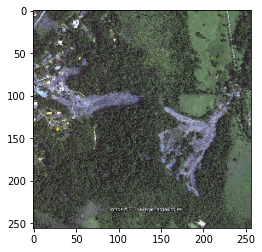

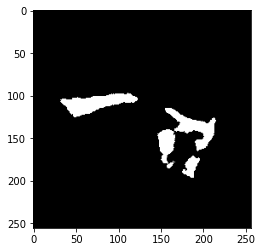

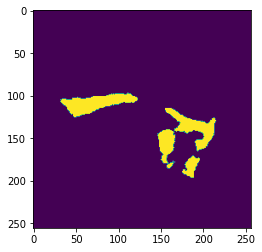

In [ ]:
imaget = np.array(cv2.imread('rj_2011_1.png'))
finalt = img_quadrado(imaget)

cortet = cv2.resize(finalt,(256, 256),cv2.INTER_NEAREST)

plt.figure()
plt.imshow(cortet)

t2 = modelo.predict(np.array([cortet])) > 0.5

for i in t2:
  plt.figure()
  plt.imshow(i[:,:,0], cmap='gray')
  plt.figure()
  plt.imshow(tf.keras.preprocessing.image.array_to_img(i))

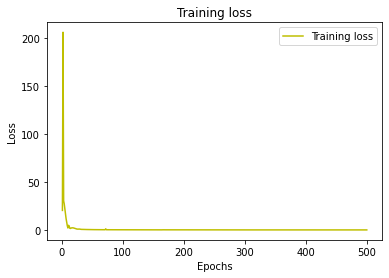

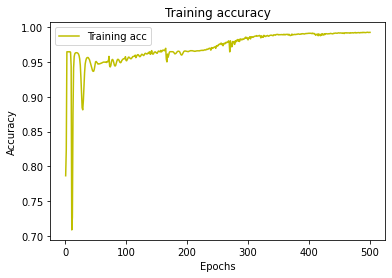

IoU score: 0.48894882


In [ ]:
from tensorflow.keras.metrics import MeanIoU

loss = history.history['loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
